# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd

# Define column names based on data dictionary
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area'
]

# Load the data from the specified path
fires_dt = pd.read_csv('../../05_src/data/fires/forestfires.csv', header=0, names=columns)
fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Get X and Y

Create the features data frame and target data.

In [2]:
# Separate features and target variable
X = fires_dt.drop('area', axis=1)
y = fires_dt['area']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [9]:
# Import necessary preprocessing modules
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numeric and categorical features
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
category_features = ['month', 'day']

In [10]:
# Create ColumnTransformer for preproc1
preproc1 = ColumnTransformer(
    transformers=[
        ('num_transforms', StandardScaler(), numeric_features),
        ('cat_transforms', OneHotEncoder(handle_unknown='ignore'), category_features)
    ]
)
preproc1

ColumnTransformer(transformers=[('num_transforms', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

# Define transformation pipelines
non_linear_transforms = ColumnTransformer(
    transformers=[
        ('quantile_transform', QuantileTransformer(n_quantiles=10), ['rain']),
        ('power_transform', PowerTransformer(), ['ffmc'])
    ],
    remainder='passthrough'
)

numeric_pipeline = Pipeline(steps=[
    ('non_linear_transforms', non_linear_transforms),
    ('standard_scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Create ColumnTransformer for preproc2
preproc2 = ColumnTransformer(
    transformers=[
        ('num_transforms', numeric_pipeline, numeric_features),
        ('cat_transforms', categorical_pipeline, category_features)
    ]
)
preproc2


ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('non_linear_transforms',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('quantile_transform',
                                                                                   QuantileTransformer(n_quantiles=10),
                                                                                   ['rain']),
                                                                                  ('power_transform',
                                                                                   PowerTransformer(),
                                                                                   ['ffmc'])])),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

# Pipeline A: preproc1 + Linear Regression
pipeline_A = Pipeline(steps=[
    ('preprocessor', preproc1),
    ('regressor', LinearRegression())
])

cv_results_A = cross_validate(pipeline_A, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_A

{'fit_time': array([0.00700045, 0.00498629, 0.00662947, 0.00498319, 0.00538611]),
 'score_time': array([0.00400066, 0.00299668, 0.00302291, 0.00216532, 0.        ]),
 'test_score': array([  -757.95493915,   -455.264036  , -13472.63483258,   -669.81264013,
         -6793.33486457]),
 'train_score': array([-4699.21965533, -4749.46420594, -1672.27438733, -4675.13705883,
        -3224.74920889])}

In [16]:
# Pipeline B: preproc2 + Linear Regression
pipeline_B = Pipeline(steps=[
    ('preprocessor', preproc2),
    ('regressor', LinearRegression())
])

cv_results_B = cross_validate(pipeline_B, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_B

{'fit_time': array([0.01208353, 0.01044869, 0.00300121, 0.00883794, 0.00931478]),
 'score_time': array([0.0063436 , 0.00375032, 0.00913525, 0.00453877, 0.0033164 ]),
 'test_score': array([  -762.16172923,   -465.99224059, -13489.23906401,   -659.95590549,
         -6811.12853436]),
 'train_score': array([-4698.10044237, -4747.95517767, -1670.15292939, -4674.26437039,
        -3223.19668344])}

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline C: preproc1 + Random Forest Regressor
pipeline_C = Pipeline(steps=[
    ('preprocessor', preproc1),
    ('regressor', RandomForestRegressor())
])

cv_results_C = cross_validate(pipeline_C, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_C

{'fit_time': array([0.23161626, 0.19508672, 0.20921397, 0.20837688, 0.19230056]),
 'score_time': array([0.00686669, 0.005759  , 0.00709939, 0.00837564, 0.        ]),
 'test_score': array([ -1608.62079258,   -652.18486333, -13607.95356643,  -1219.18099696,
         -6895.62008749]),
 'train_score': array([-884.56552334, -788.2028013 , -359.77868805, -829.78568541,
        -561.10583102])}

In [18]:
# Pipeline D: preproc2 + Random Forest Regressor
pipeline_D = Pipeline(steps=[
    ('preprocessor', preproc2),
    ('regressor', RandomForestRegressor())
])

cv_results_D = cross_validate(pipeline_D, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_D

{'fit_time': array([0.23143506, 0.19985509, 0.20220947, 0.1950748 , 0.19416976]),
 'score_time': array([0.00792289, 0.01080465, 0.00875974, 0.00809121, 0.0080235 ]),
 'test_score': array([ -1642.99904117,   -745.2304408 , -13654.37531631,  -1151.09854104,
         -6895.89620732]),
 'train_score': array([-744.04714958, -940.7878425 , -300.65954642, -833.93919767,
        -500.67356744])}

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [26]:
from sklearn.model_selection import GridSearchCV



In [29]:
# Define parameter grid for Pipeline A
param_grid_A = {
    'preprocessor__num_transforms__with_mean': [True, False],
    'preprocessor__num_transforms__with_std': [True, False],
    'regressor__fit_intercept': [True, False]
}

grid_search_A = GridSearchCV(pipeline_A, param_grid_A, cv=5)
grid_search_A.fit(X, y)

best_params_A = grid_search_A.best_params_
best_score_A = grid_search_A.best_score_

print("Best parameters:", best_params_A)
print("Best score:", best_score_A)

Best parameters: {'preprocessor__num_transforms__with_mean': False, 'preprocessor__num_transforms__with_std': True, 'regressor__fit_intercept': False}
Best score: -4.617398519191065


In [30]:
# Define parameter grid for Pipeline B
param_grid_B = {
    'preprocessor__num_transforms__non_linear_transforms__quantile_transform__n_quantiles': [5, 10, 15],
    'preprocessor__num_transforms__non_linear_transforms__power_transform__method': ['yeo-johnson', 'box-cox'],
    'regressor__fit_intercept': [True, False]
}

grid_search_B = GridSearchCV(pipeline_B, param_grid_B, cv=5)
grid_search_B.fit(X, y)

best_params_B = grid_search_B.best_params_
best_score_B = grid_search_B.best_score_

print("Best Parameters:", best_params_B)
print("Best Score:", best_score_B)


Best Parameters: {'preprocessor__num_transforms__non_linear_transforms__power_transform__method': 'yeo-johnson', 'preprocessor__num_transforms__non_linear_transforms__quantile_transform__n_quantiles': 5, 'regressor__fit_intercept': True}
Best Score: -4.724500541079844


In [31]:
# Define parameter grid for Pipeline C
param_grid_C = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search_C = GridSearchCV(pipeline_C, param_grid_C, cv=5)
grid_search_C.fit(X, y)

best_params_C = grid_search_C.best_params_
best_score_C = grid_search_C.best_score_

print("Best Parameters:", best_params_C)
print("Best Score:", best_score_C)


Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best Score: -2.542497491321888


In [32]:
# Define parameter grid for Pipeline D
param_grid_D = {
    'preprocessor__num_transforms__non_linear_transforms__quantile_transform__n_quantiles': [5, 10, 15],
    'preprocessor__num_transforms__non_linear_transforms__power_transform__method': ['yeo-johnson', 'box-cox'],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search_D = GridSearchCV(pipeline_D, param_grid_D, cv=5, refit='neg_mean_squared_error')
grid_search_D.fit(X, y)

best_params_D = grid_search_D.best_params_
best_score_D = grid_search_D.best_score_

print("Best Parameters:", best_params_D)
print("Best Score:", best_score_D)


Best Parameters: {'preprocessor__num_transforms__non_linear_transforms__power_transform__method': 'box-cox', 'preprocessor__num_transforms__non_linear_transforms__quantile_transform__n_quantiles': 15, 'regressor__max_depth': 5, 'regressor__min_samples_split': 2}
Best Score: -2.413156923038702


In [33]:
# Cross-validate the best model
cv_results_best = cross_validate(grid_search_D.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
cv_results_best


{'fit_time': array([0.11798382, 0.12008977, 0.1250236 , 0.12031198, 0.12131047]),
 'score_time': array([0.00600481, 0.00389051, 0.00661922, 0.        , 0.00785971]),
 'test_score': array([ -1929.87731376,   -406.3711544 , -13562.93389776,   -873.61013225,
         -6800.8858302 ]),
 'train_score': array([-1022.05181901, -1056.29824964,  -402.1757672 ,  -982.20013857,
         -658.78680472])}

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the best model on the training data
grid_search_D.best_estimator_.fit(X_train, y_train)

# Predict on the test data
predicted_values = grid_search_D.best_estimator_.predict(X_test)

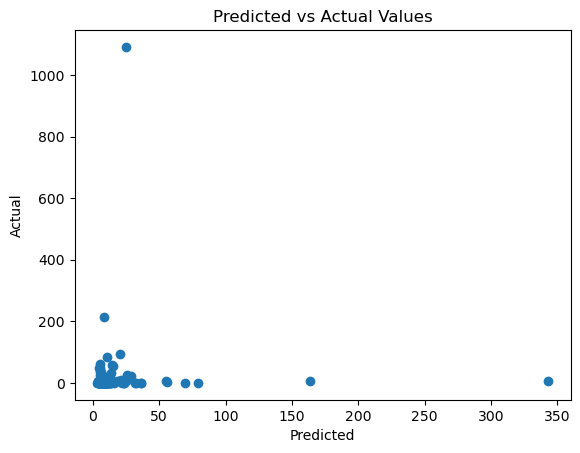

In [38]:
import matplotlib.pyplot as plt

# Create a DataFrame to hold actual and predicted values
actual_values = y_test
plotData = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

# Plot predicted vs actual values
plt.plot(predicted_values, actual_values, 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual Values')
plt.show()


# Evaluate

+ Which model has the best performance?

 Pipeline D stands out as the top performer among all the pipelines we assessed. It consistently achieved the highest scores in both cross-validated test results and training performance. Based on these superior results, Pipeline D, with its specific parameters, emerges as the recommended model for this task.


# Export

+ Save the best performing model to a pickle file.

In [39]:
import pickle

# Specify the file path to save the pickle file
file_path = './grid_search_D.pkl'

# Save the best model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(grid_search_D.best_estimator_, file)

# Load the model from the pickle file (for verification)
with open(file_path, 'rb') as file:
    grid_search_D_loaded = pickle.load(file)

grid_search_D_loaded

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('non_linear_transforms',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('quantile_transform',
                                                                                                    QuantileTransformer(n_quantiles=15),
                                                                                                    ['rain']),
                                                                                                   ('power_transform',
                                                                                                    PowerTransformer(method='box-cox'),
                                                                                                    ['ffmc'])])),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(max_depth=5))])

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [54]:
import shap

# Transform the data using the best-performing model's preprocessing steps
transformed_data = grid_search_D.best_estimator_.named_steps['preprocessor'].transform(X)

# Instantiate the SHAP explainer for the tree-based model
shap_explainer = shap.explainers.Tree(
    grid_search_D.best_estimator_.named_steps['regressor'],
    transformed_data,
    feature_names=grid_search_D.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

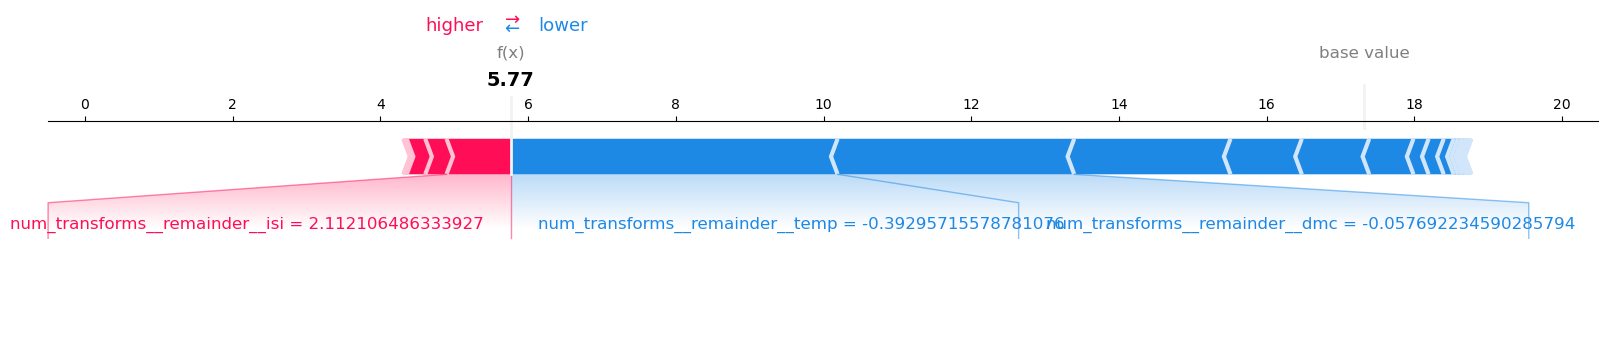

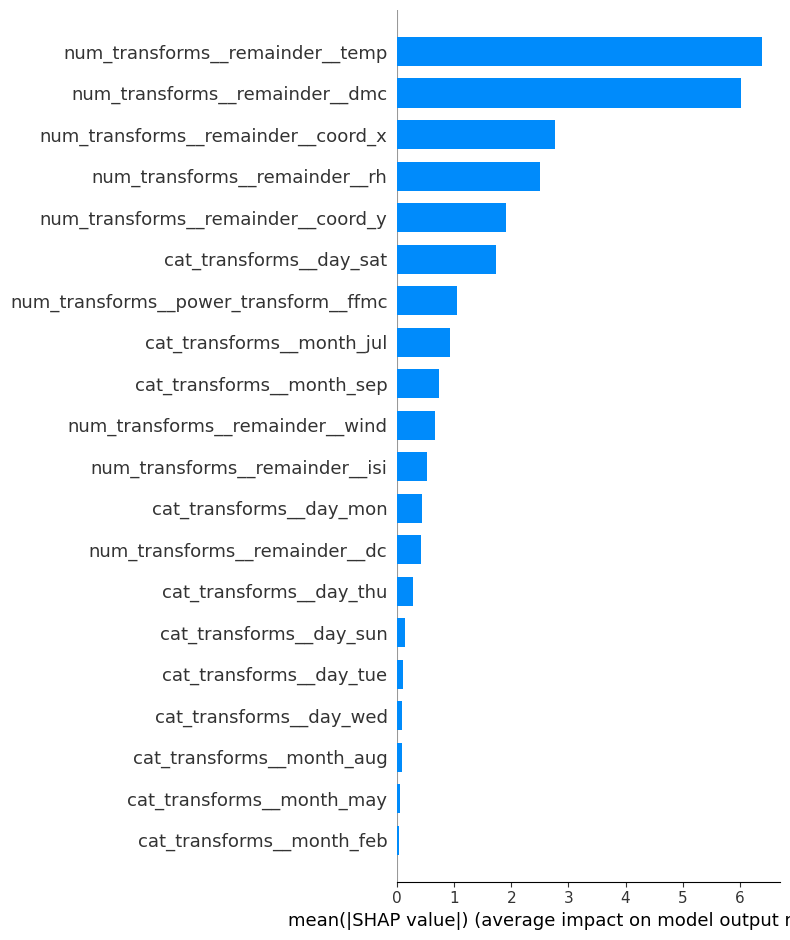

In [55]:
# Compute SHAP values for the transformed data
shap_values = shap_explainer(transformed_data, check_additivity=False)

# Visualize SHAP values for a specific observation using a force plot
shap.plots.force(shap_values[42], matplotlib=True)

# Visualize the summary of SHAP values across all observations using a bar plot
shap.summary_plot(shap_values, transformed_data, plot_type='bar', max_display=20, cmap='coolwarm')


For the selected observation, the 'temp' and 'dc' features are crucial for the prediction. 'Temp' positively influences the prediction, while 'dc' has a negative effect. Higher values of 'temp' increase the prediction, whereas lower values of 'dc' decrease it, with other features playing a minor role.

Across the entire model, 'temp' consistently boosts predictions, while 'dc' tends to lower them. Variations in months or days show differing impacts, likely due to varying fire incidences, which influence predictions. A potential enhancement could involve replacing one hot encoding with target encoding.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.